### Brief about the dataset :

<p> The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed. </p>

__Description of experiment__

<p> The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.</p>

<p>The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.</p>

__Attribute information__

For each record in the dataset the following is provided:

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.
- An identifier of the subject who carried out the experiment.

<b> Dataset source credits : Kaggle </b> https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

<img src="https://images.squarespace-cdn.com/content/v1/597d2753be6594cef6a34840/1501425209549-H2H9AZNAC3LMBKRZCHIL/ke17ZwdGBToddI8pDm48kITcJBvE1wk9BMTjuPn_gmB7gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z4YTzHvnKhyp6Da-NYroOW3ZGjoBKy3azqku80C789l0le00SKh50FmsJr_9wQ9VAETQd4wUIeRmkKjdrZnmw1b3k-WGA6oYaXcSK6cHKpzNQ/micromachines-06-01100-g002.png?format=1500w" width="500" height="500" />


<h3> Brief about the Accelerometer and the Gyroscope sensors : </h3>

<b> Accelerometer sensors </b>

Accelerometer sensors are the ones which measures the acceleration or the rate at which you/your smart phone is moving at, think of the applications like Google Maps, which kinds of uses Accelerometer to find the speed at which you are moving and calculates the time it takes to reach the destination.

<img src = "https://geospatialmedia.s3.amazonaws.com/wp-content/uploads/2019/06/speedometer-google-maps-.jpg" height="500" width="500"/>

<b> Gyroscope sensors </b>

Gyroscope sensors on teh other hand, measures the Angular or rotational changes in the device. These sensors are vital to understand the orientation of your phone. Typical example would be the use of Portrait or Landscape mode in our smartphones, which can detect the orientation of your phones and changes the screen position/orientation accordingly.

Screenshot 2020-10-26 at 1.56.42 PM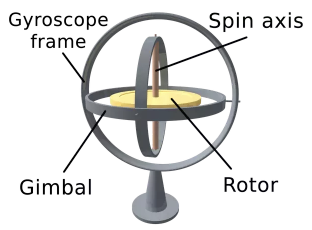

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [201]:
data_set_train = pd.read_csv("./train.csv")
data_set_test = pd.read_csv("./test.csv")
data_set_train['Data']= "train"
data_set_test['Data']= "test"
data_set_test.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  angle(tBodyAccMean,gravity)  \
0         -0.674302         -0.894088  ...                     0.006462   
1         -0.945823         -0.894088  ...                    -0.083495   
2         -0.963483         -0.939260  ...                    -0.034956   
3         -0.968897         -0.938610  ...                    -0.017067   
4         -0.977346         -0.938610  ...                    -0.002223   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.162920                         -0.825886   
1                              0.017500                         -0.434375   
2                              0.202302                          0.064103   
3                              0.154438                          0.340134   
4                             -0.040046                          0.736715   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                              0.271151             -0.720009   
1                              0.920593             -0.698091   
2                              0.145068             -0.702771   
3                              0.296407             -0.698954   
4                             -0.118545             -0.692245   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject  Activity  Data  
0              0.276801             -0.057978        2  STANDING  test  
1              0.281343             -0.083898        2  STANDING  test  
2              0.280083             -0.079346        2  STANDING  test  
3              0.284114             -0.077108        2  STANDING  test  
4              0.290722             -0.073857        2  STANDING  test  

[5 rows x 564 columns]

In [202]:
data_set_train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  angle(tBodyAccMean,gravity)  \
0         -0.923527         -0.934724  ...                    -0.112754   
1         -0.957686         -0.943068  ...                     0.053477   
2         -0.977469         -0.938692  ...                    -0.118559   
3         -0.989302         -0.938692  ...                    -0.036788   
4         -0.990441         -0.942469  ...                     0.123320   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.030400                         -0.464761   
1                             -0.007435                         -0.732626   
2                              0.177899                          0.100699   
3                             -0.012892                          0.640011   
4                              0.122542                          0.693578   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                             -0.018446             -0.841247   
1                              0.703511             -0.844788   
2                              0.808529             -0.848933   
3                             -0.485366             -0.848649   
4                             -0.615971             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject  Activity   Data  
0              0.179941             -0.058627        1  STANDING  train  
1              0.180289             -0.054317        1  STANDING  train  
2              0.180637             -0.049118        1  STANDING  train  
3              0.181935             -0.047663        1  STANDING  train  
4              0.185151             -0.043892        1  STANDING  train  

[5 rows x 564 columns]

In [234]:
data_set.shape

(10299, 564)

### "Subject" is the identifier/participant as who carried out the experiment

In [203]:
data_set = pd.concat([data_set_train,data_set_test])
data_set.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  angle(tBodyAccMean,gravity)  \
0         -0.923527         -0.934724  ...                    -0.112754   
1         -0.957686         -0.943068  ...                     0.053477   
2         -0.977469         -0.938692  ...                    -0.118559   
3         -0.989302         -0.938692  ...                    -0.036788   
4         -0.990441         -0.942469  ...                     0.123320   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.030400                         -0.464761   
1                             -0.007435                         -0.732626   
2                              0.177899                          0.100699   
3                             -0.012892                          0.640011   
4                              0.122542                          0.693578   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                             -0.018446             -0.841247   
1                              0.703511             -0.844788   
2                              0.808529             -0.848933   
3                             -0.485366             -0.848649   
4                             -0.615971             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject  Activity   Data  
0              0.179941             -0.058627        1  STANDING  train  
1              0.180289             -0.054317        1  STANDING  train  
2              0.180637             -0.049118        1  STANDING  train  
3              0.181935             -0.047663        1  STANDING  train  
4              0.185151             -0.043892        1  STANDING  train  

[5 rows x 564 columns]

In [204]:
data_set.shape

(10299, 564)

### List of columns, which are categorical in nature

In [205]:
cat_col=[]
for i in data_set.columns:
    if data_set[i].dtype=='O':
        cat_col.append(i)

print("List of columns which are categorical in nature are :", cat_col)

List of columns which are categorical in nature are : ['Activity', 'Data']


In [206]:
#Are there any Missing values in the dataset?
print("Number of missing values in teh Dataset are : ", data_set.isnull().sum().sum())

Number of missing values in teh Dataset are :  0


#### <p>From the Dataset description above, we know that the data is collected pre-dominantly using 2 different sensors in the smartphone :</p>

- Accelerometer
- Gyroscope

Let's see the ratio of sensor metrics that we have in our overall dataset 

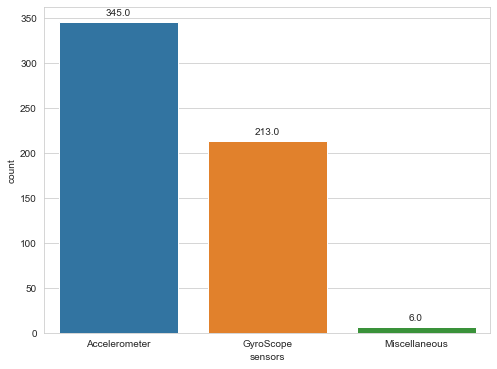

In [207]:
Accel = []
Gyro = []
Misc = []

for i in data_set.columns:
    if "Acc" in i:
        Accel.append(i)
    elif "Gyro" in i:
        Gyro.append(i)
    else :
        Misc.append(i)

data_sensor = pd.DataFrame({'sensors':['Accelerometer','GyroScope','Miscellaneous'],'count':[len(Accel),len(Gyro),len(Misc)]})
plt.figure(figsize=(8,6))
splot=sns.barplot(x='sensors',y='count',data=data_sensor);
for p in splot.patches:
    splot.annotate(format(p.get_height(),'.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


#### Since our Target variable is "Activity" and as seen baove, its categorical in nature , let's try and see the various categories and their value counts

In [208]:
data_set['Activity'].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

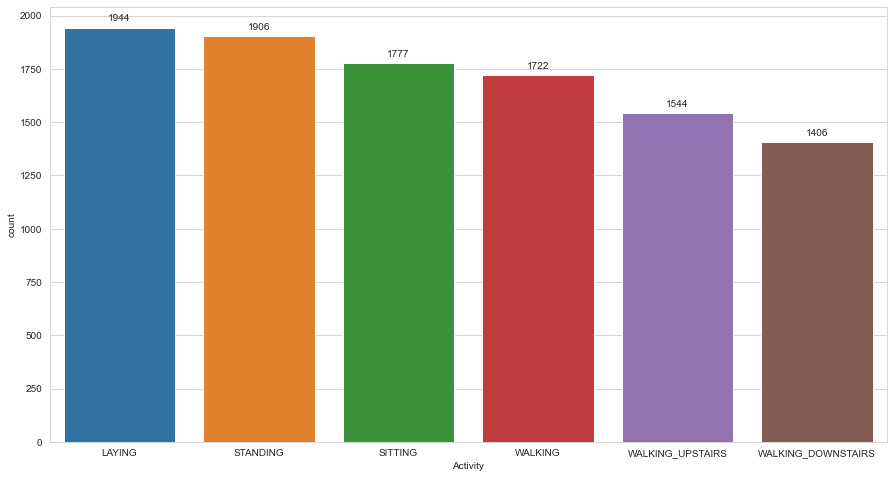

In [209]:
plt.figure(figsize=(15,8))
splot=sns.countplot(data_set['Activity'],order=data_set['Activity'].value_counts().index)
sns.set_style("whitegrid")
for p in splot.patches:
    splot.annotate(p.get_height(),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   va='center', ha='center',
                   xytext = (0, 9), 
                   textcoords = 'offset points')

<p> From the above chart, we could see that more or less all the categories of the TV (Activity) are in the same ball park figure and hence we could say that data is <b>not imbalanced.</b></p>

Since there are huge number of features __~562__, we can use PCA to reduce the No. of features, by picking up the dataset selectively explaining the highest/maximum variance using the __PCA model__

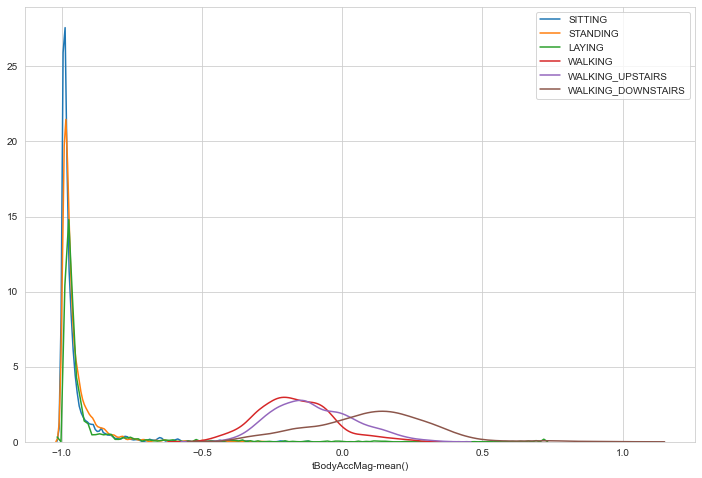

In [210]:
plt.figure(figsize=(12,8))
sns.distplot(data_set[data_set['Activity']=='SITTING']['tBodyAccMag-mean()'],hist=False,label="SITTING")
sns.distplot(data_set[data_set['Activity']=='STANDING']['tBodyAccMag-mean()'],hist=False,label="STANDING")
sns.distplot(data_set[data_set['Activity']=='LAYING']['tBodyAccMag-mean()'],hist=False,label="LAYING")
sns.distplot(data_set[data_set['Activity']=='WALKING']['tBodyAccMag-mean()'],hist=False,label="WALKING")
sns.distplot(data_set[data_set['Activity']=='WALKING_UPSTAIRS']['tBodyAccMag-mean()'],hist=False,label="WALKING_UPSTAIRS")
sns.distplot(data_set[data_set['Activity']=='WALKING_DOWNSTAIRS']['tBodyAccMag-mean()'],hist=False,label="WALKING_DOWNSTAIRS")

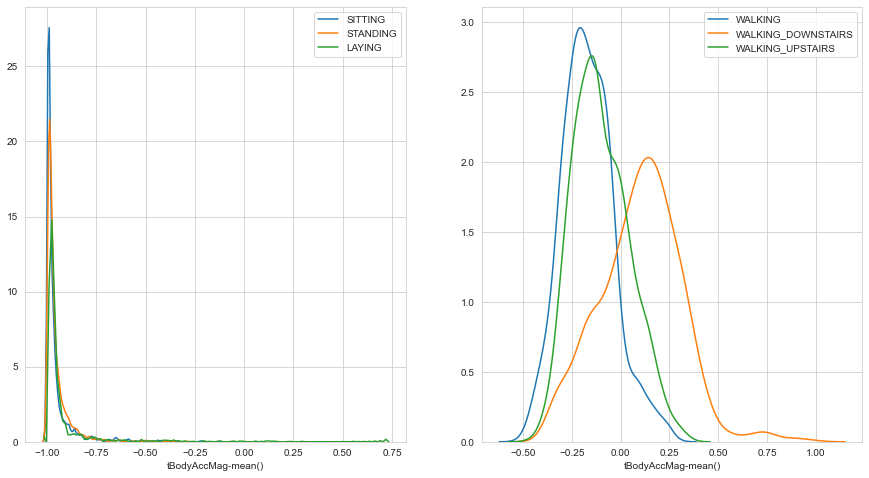

In [211]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)

sns.distplot(data_set[data_set['Activity']=='SITTING']['tBodyAccMag-mean()'],hist=False,label="SITTING")
sns.distplot(data_set[data_set['Activity']=='STANDING']['tBodyAccMag-mean()'],hist=False,label="STANDING")
sns.distplot(data_set[data_set['Activity']=='LAYING']['tBodyAccMag-mean()'],hist=False,label="LAYING")

plt.subplot(1,2,2)

sns.distplot(data_set[data_set['Activity']=='WALKING']['tBodyAccMag-mean()'],hist=False,label="WALKING")
sns.distplot(data_set[data_set['Activity']=='WALKING_DOWNSTAIRS']['tBodyAccMag-mean()'],hist=False,label="WALKING_DOWNSTAIRS")
sns.distplot(data_set[data_set['Activity']=='WALKING_UPSTAIRS']['tBodyAccMag-mean()'],hist=False,label="WALKING_UPSTAIRS")


This metrics tBodyAccMag-mean()highlights Walking_Downstairs Activity


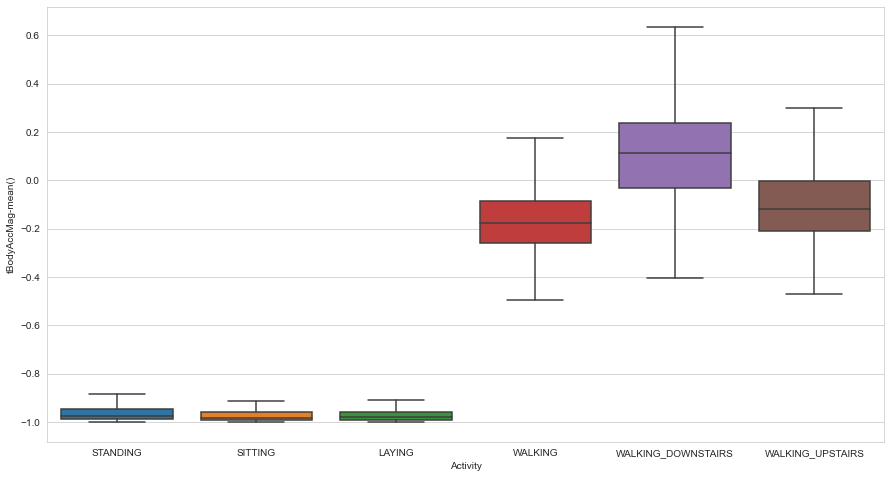

This metrics angle(X,gravityMean)highlights LAYING Activity


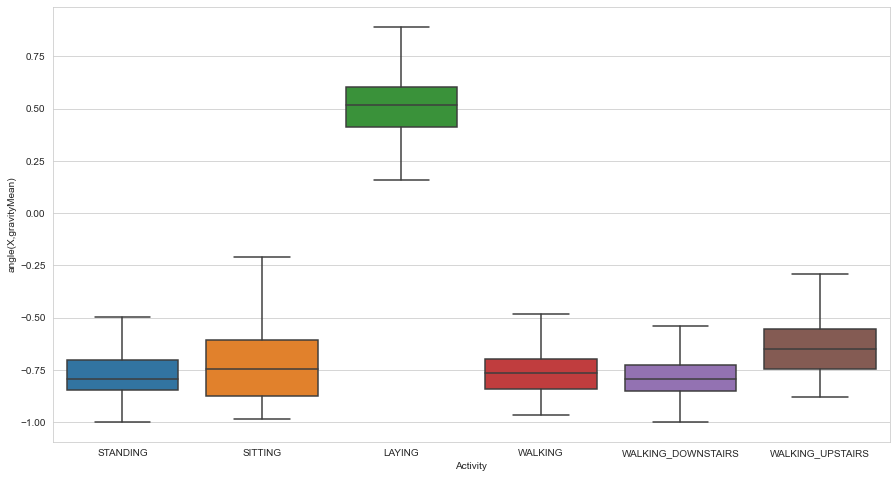

This metrics tBodyGyroMag-entropy()highlights WALKING Activity


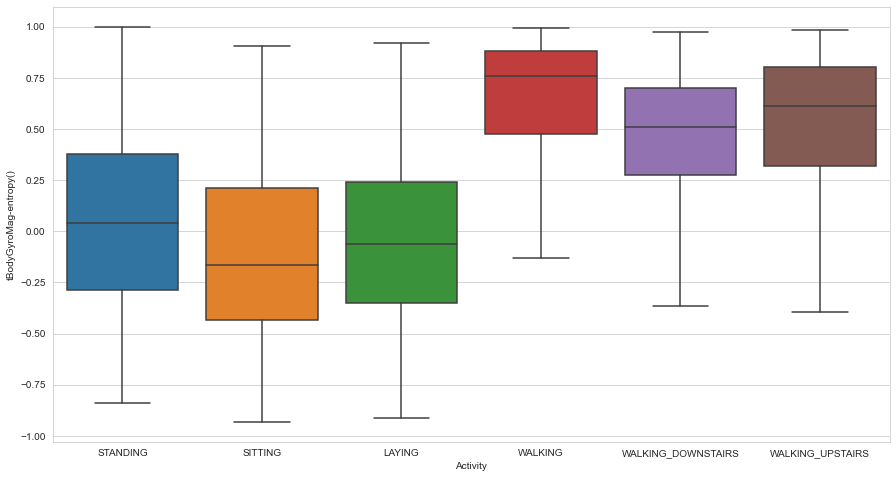

This metrics fBodyAcc-meanFreq()-Xhighlights STANDING Activity


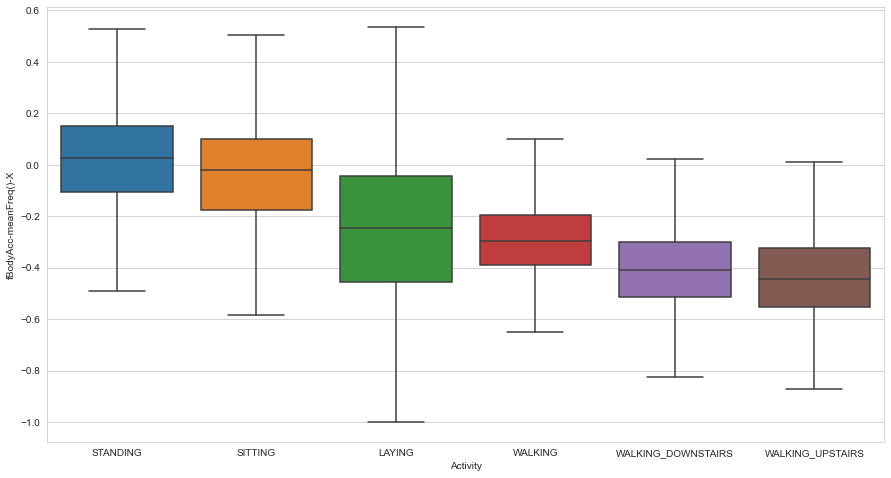

This metrics tBodyAcc-std()-Zhighlights WALKING_UPSTAIRS Activity


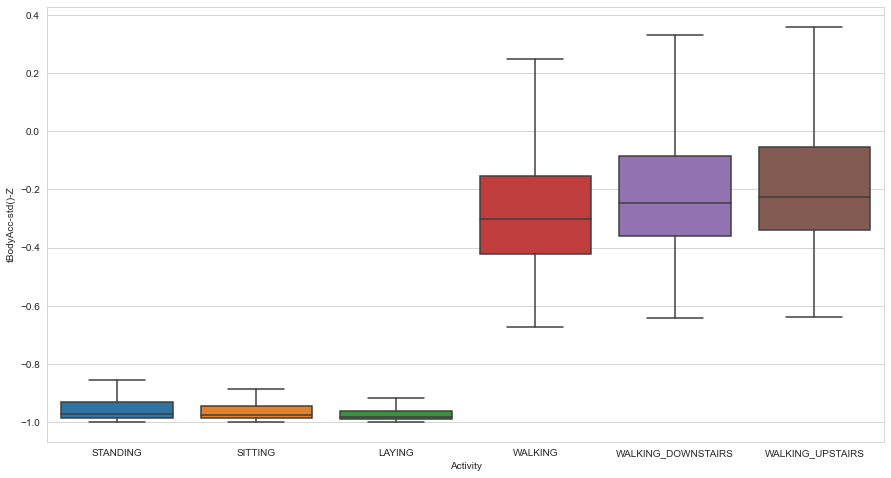

This metrics tBodyGyro-entropy()-Xhighlights SITTING Activity


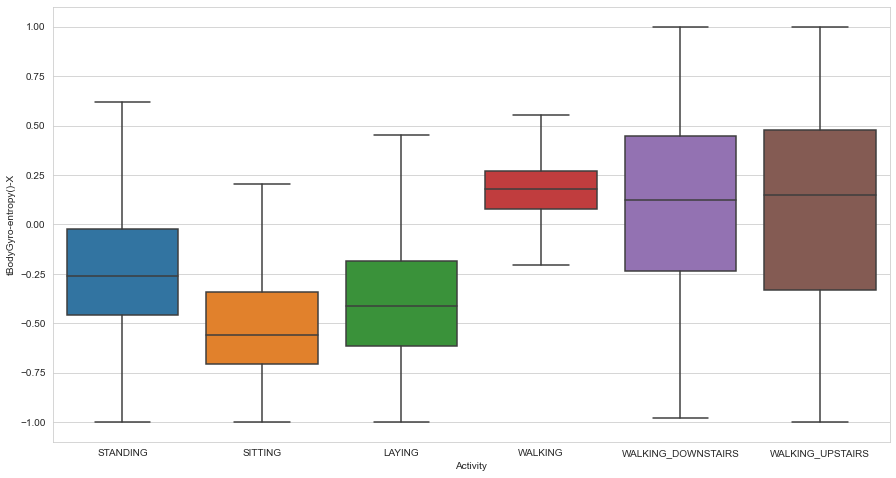

In [212]:
list = ['tBodyAccMag-mean()','angle(X,gravityMean)','tBodyGyroMag-entropy()','fBodyAcc-meanFreq()-X', 'tBodyAcc-std()-Z', 'tBodyGyro-entropy()-X']
Activity_list = ['Walking_Downstairs','LAYING','WALKING','STANDING','WALKING_UPSTAIRS','SITTING']
for index,i in enumerate(list):
    plt.figure(figsize=(15,8))
    print("This metrics " + i + "highlights " + Activity_list[index] + " Activity")
    sns.boxplot(x='Activity',y=i,data=data_set,showfliers=False)
    plt.show()

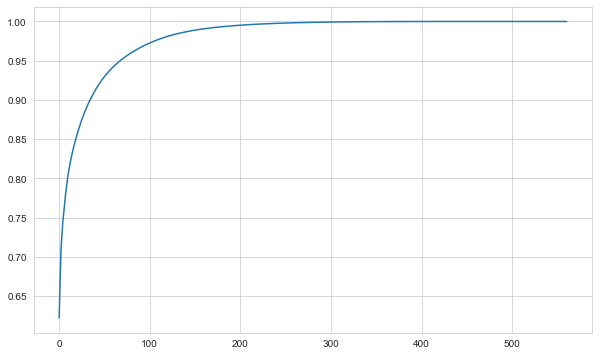

In [213]:
pre_pca = PCA()
pre_pca_obj=pre_pca.fit(data_set.drop(['Activity','subject','Data'],axis=1))
pre_pca_obj.explained_variance_ratio_

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pre_pca_obj.explained_variance_ratio_))

### Since the dimensions were huge, we have used PCA to demonstrate the dimensionality reduction, from the above knee plot, we can see that 95% of information usage is reasonable

In [214]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
data_set_pca = pca.fit_transform(data_set.drop(['Activity','subject','Data'],axis=1))
data_set_pca.shape

(10299, 69)

### We can see from the shape that the PCA has reduced the dimensions from 562 to 69 having explaining the 95% of the data

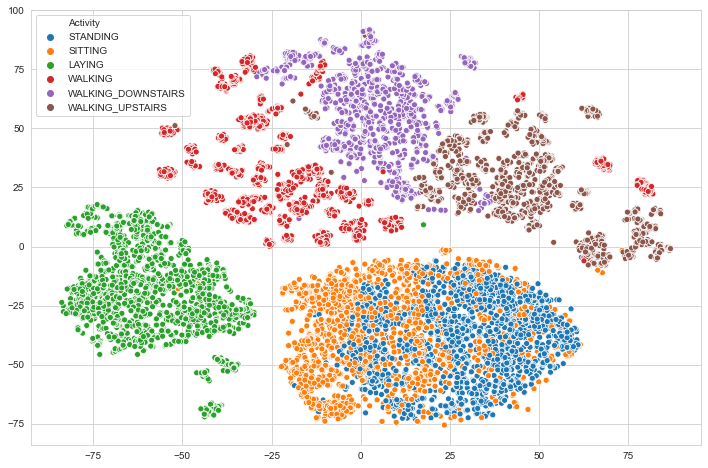

In [215]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(0.95)
data_set_pca = pca.fit_transform(data_set.drop(['Activity','subject','Data'],axis=1))
data_set_pca

tsne = TSNE()
data_set_pca_tsne = tsne.fit_transform(data_set_pca)

plt.figure(figsize=(12,8))
sns.scatterplot(x=data_set_pca_tsne[:,0],y=data_set_pca_tsne[:,1],hue=data_set['Activity'])

#### From the scatter plot above, we could see that there is a clear clustering boundaries defined across the patterns pf Activity.

In [216]:
label = data_set['Activity']

In [217]:
label_counts = label.value_counts()
label_counts

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

In [218]:
label.unique().shape[0]

6

In [219]:
for i, group in enumerate(label_counts.index):
    mask = (label==group).values
    print(mask)

[False False False ... False False False]
[ True  True  True ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ...  True  True  True]
[False False False ... False False False]


In [220]:
mask = (label=='LAYING').values
mask

array([False, False, False, ..., False, False, False])

In [221]:
pd.set_option('display.max_rows',10)

#### Below is the total time recorded in seconds for each of the "Activity"

In [222]:
(data_set.groupby([label,data_set['subject']])['Data'].count().reset_index().groupby('Activity').agg({'Data':'mean'})*1.28).rename(columns={'Data':'Seconds'})

Seconds
Activity                     
LAYING              82.944000
SITTING             75.818667
STANDING            81.322667
WALKING             73.472000
WALKING_DOWNSTAIRS  59.989333
WALKING_UPSTAIRS    65.877333

In [223]:
#!pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier 

### Below is the importance of the sensors for all the participants for "Walking" pattern

(1722, 563)


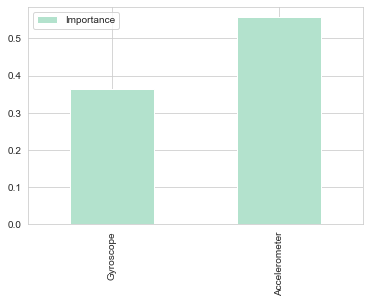

In [224]:
#For walking style of a given participants, lets study the impoprtance of the sensors
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data_set_walk = data_set[label=='WALKING'].drop(['Activity'],axis=1).copy()
print(data_set_walk.shape)
data_set_data = data_set_walk.pop('Data')
data_set_subject = data_set_walk.pop('subject')

scaled_data = StandardScaler()
scaled_walk_data=scaled_data.fit_transform(data_set_walk)

lbl = LabelEncoder()
lbl_encoded_subject = lbl.fit_transform(data_set_subject)

X_train,X_test,Y_train,Y_test = train_test_split(scaled_walk_data,lbl_encoded_subject,random_state=3)


dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train,Y_train)

features = data_set.drop(['Data','Activity','subject'],axis=1).columns
importances = dt_model.feature_importances_

#initialize the variables with the values 0
data = {'Gyroscope':0,'Accelerometer':0}

for feature, importance in zip(features, importances):
    if 'Gyro' in feature:
        data['Gyroscope'] += importance
    if 'Acc' in feature:
        data['Accelerometer'] += importance

data_dict = pd.DataFrame.from_dict(data,orient='index')
data_dict.rename(columns={0:'Importance'},inplace=True)
data_dict.plot(kind='bar',colormap='Pastel2')

##### As we see above, for the walking pattern, Accelerometer sensor importance seems to be more prominent than Gyroscope

In [225]:
mask = (label=='WALKING_UPSTAIRS') | (label=='WALKING_DOWNSTAIRS')
#data_set[(label=='WALKING_UPSTAIRS') | (label=='WALKING_DOWNSTAIRS')].groupby(['subject']).count()
data_set[mask].groupby([label[mask],'subject']).count()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  \
Activity           subject                                         
WALKING_DOWNSTAIRS 1                       49                 49   
                   2                       47                 47   
                   3                       49                 49   
                   4                       45                 45   
                   5                       47                 47   
...                                       ...                ...   
WALKING_UPSTAIRS   26                      55                 55   
                   27                      51                 51   
                   28                      51                 51   
                   29                      49                 49   
                   30                      65                 65   

                            tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
Activity           subject                                        
WALKING_DOWNSTAIRS 1                       49                49   
                   2                       47                47   
                   3                       49                49   
                   4                       45                45   
                   5                       47                47   
...                                       ...               ...   
WALKING_UPSTAIRS   26                      55                55   
                   27                      51                51   
                   28                      51                51   
                   29                      49                49   
                   30                      65                65   

                            tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
Activity           subject                                       
WALKING_DOWNSTAIRS 1                      49                49   
                   2                      47                47   
                   3                      49                49   
                   4                      45                45   
                   5                      47                47   
...                                      ...               ...   
WALKING_UPSTAIRS   26                     55                55   
                   27                     51                51   
                   28                     51                51   
                   29                     49                49   
                   30                     65                65   

                            tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
Activity           subject                                       
WALKING_DOWNSTAIRS 1                      49                49   
                   2                      47                47   
                   3                      49                49   
                   4                      45                45   
                   5                      47                47   
...                                      ...               ...   
WALKING_UPSTAIRS   26                     55                55   
                   27                     51                51   
                   28                     51                51   
                   29                     49                49   
                   30                     65                65   

                            tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
Activity           subject                                      ...   
WALKING_DOWNSTAIRS 1                      49                49  ...   
                   2                      47                47  ...   
                   3                      49                49  ...   
                   4                      45                45  ...   
                   5                      47                47  ...   
...                                      ...            

In [226]:
len(data_set['subject'].unique())

30

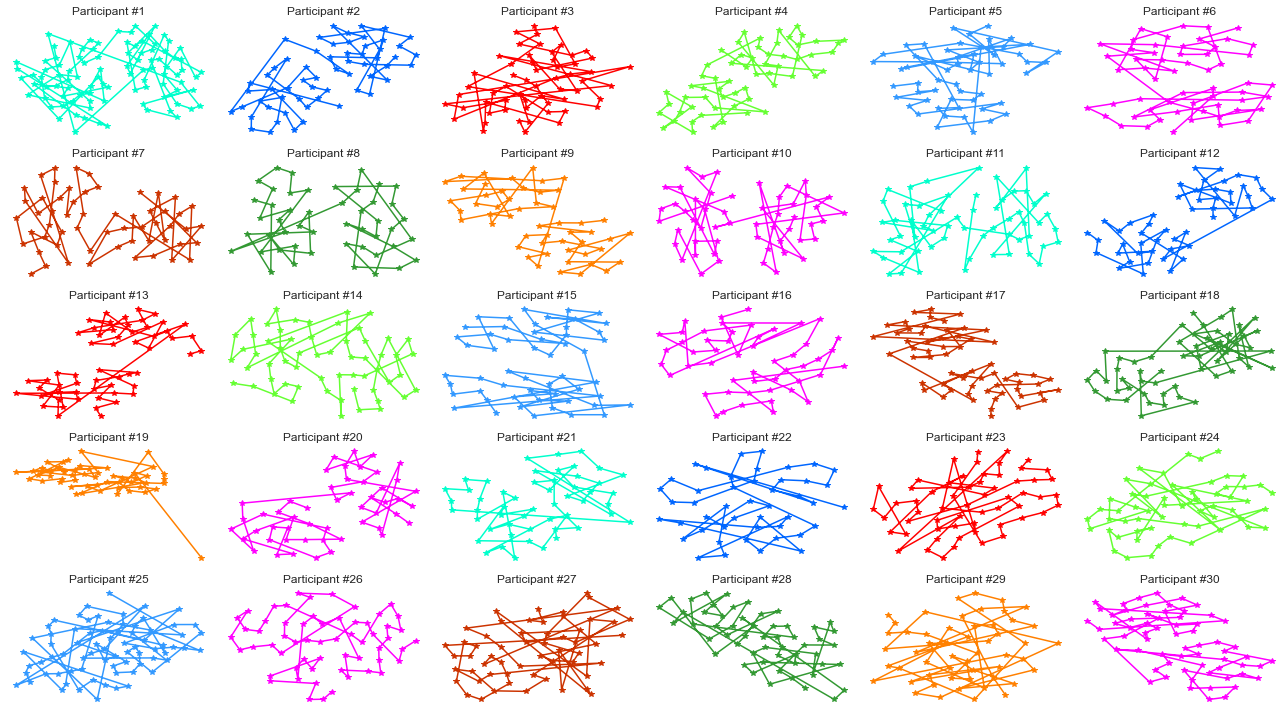

In [227]:
fig, ax = plt.subplots(5,6, figsize=(18,10))
color_map=["#00ffcc","#0066ff","#ff0000","#66ff33","#3399ff","#ff00ff","#cc3300","#339933","#ff8000","#ff00ff","#00ffcc","#0066ff","#ff0000","#66ff33","#3399ff","#ff00ff","#cc3300","#339933","#ff8000","#ff00ff","#00ffcc","#0066ff","#ff0000","#66ff33","#3399ff","#ff00ff","#cc3300","#339933","#ff8000","#ff00ff"]
for sub in range(0,len(data_set['subject'].unique())):
    #Get all the walking related metrics (for Accelerometer and Gyroscope sensor attributes)
    person=data_set[(label=='WALKING') & (data_set['subject']==(sub+1))].drop(['Activity','subject','Data'],axis=1)
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(person)
    
    pca = PCA(0.9)
    pca_scaled_data = pca.fit_transform(scaled_data)
    
    tsne = TSNE()
    tsne_pca_scaled_data = tsne.fit_transform(pca_scaled_data)
    
    #Let's create the plot
    ax[sub//6][sub%6].plot(tsne_pca_scaled_data[:,0],tsne_pca_scaled_data[:,1],'*-',color=color_map[sub])
    ax[sub//6][sub%6].set_title('Participant #{}'.format(sub+1))
    ax[sub//6][sub%6].axis('off')

plt.tight_layout()
plt.show()

In [228]:
label.unique()[0]

'STANDING'

##### Below is the pattern for each activity across all 30 participants :

######################################################################
Participants unique STANDING pattern
######################################################################


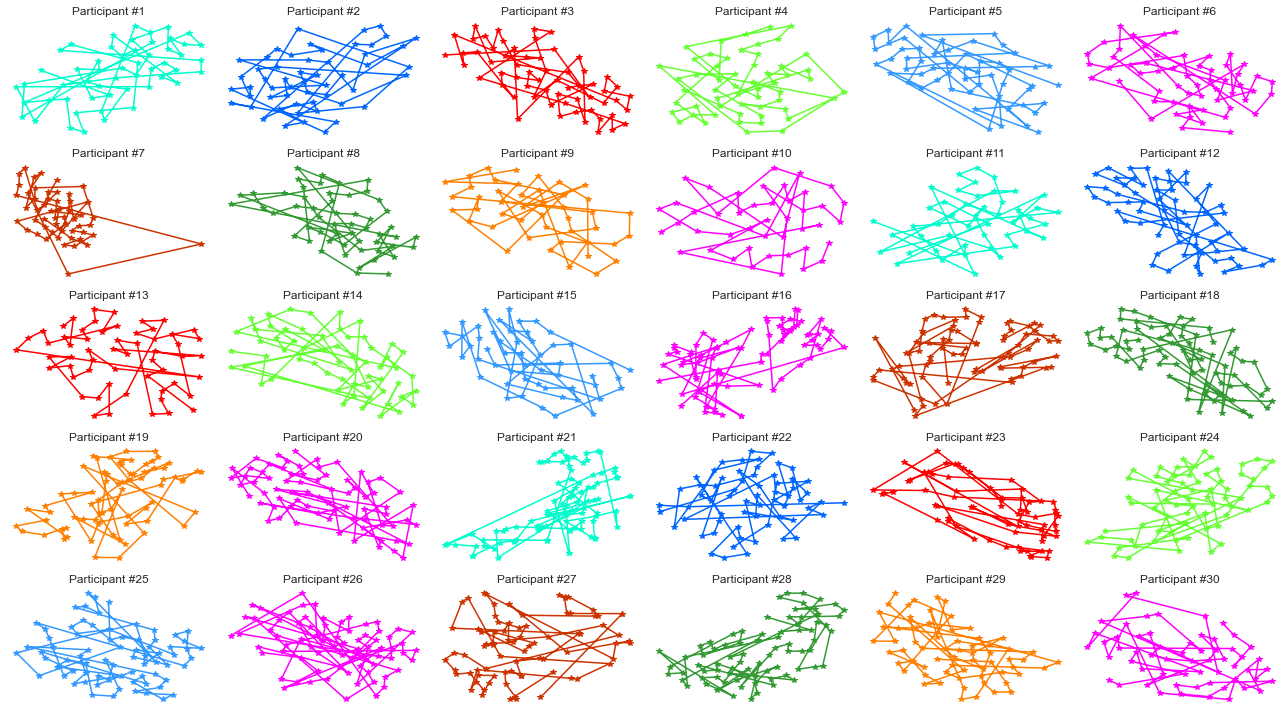

######################################################################
Participants unique SITTING pattern
######################################################################


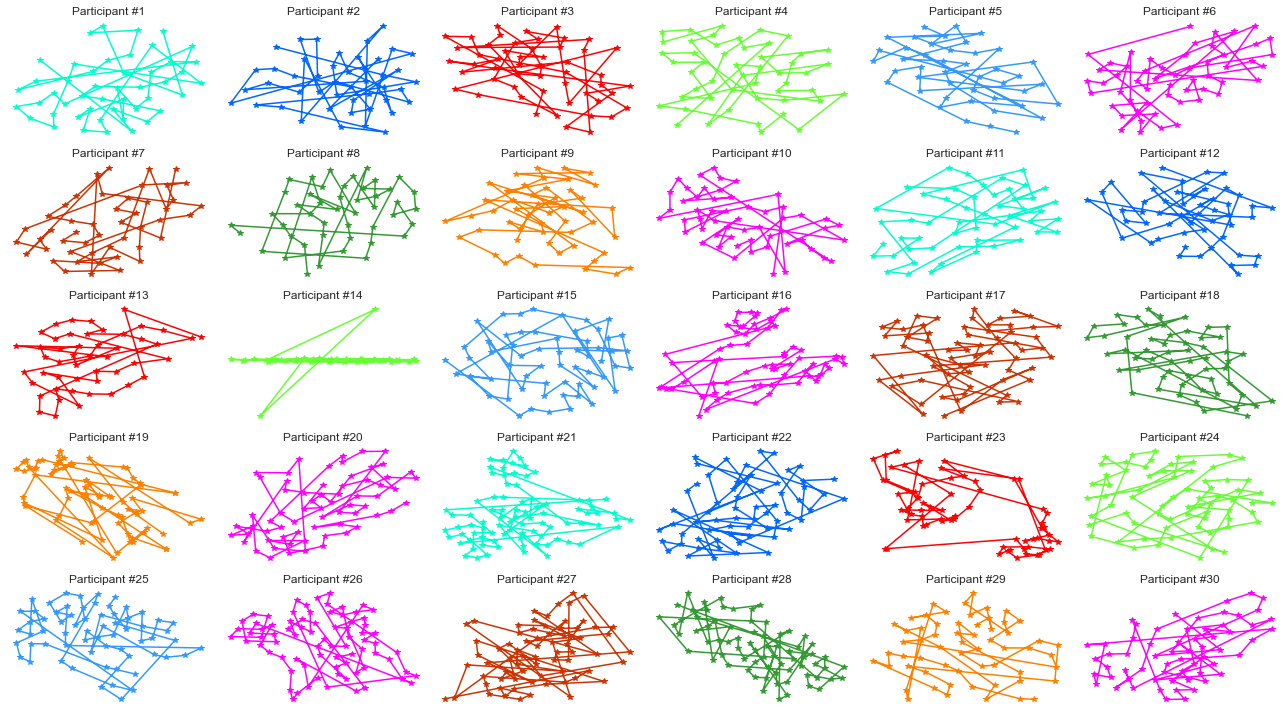

######################################################################
Participants unique LAYING pattern
######################################################################


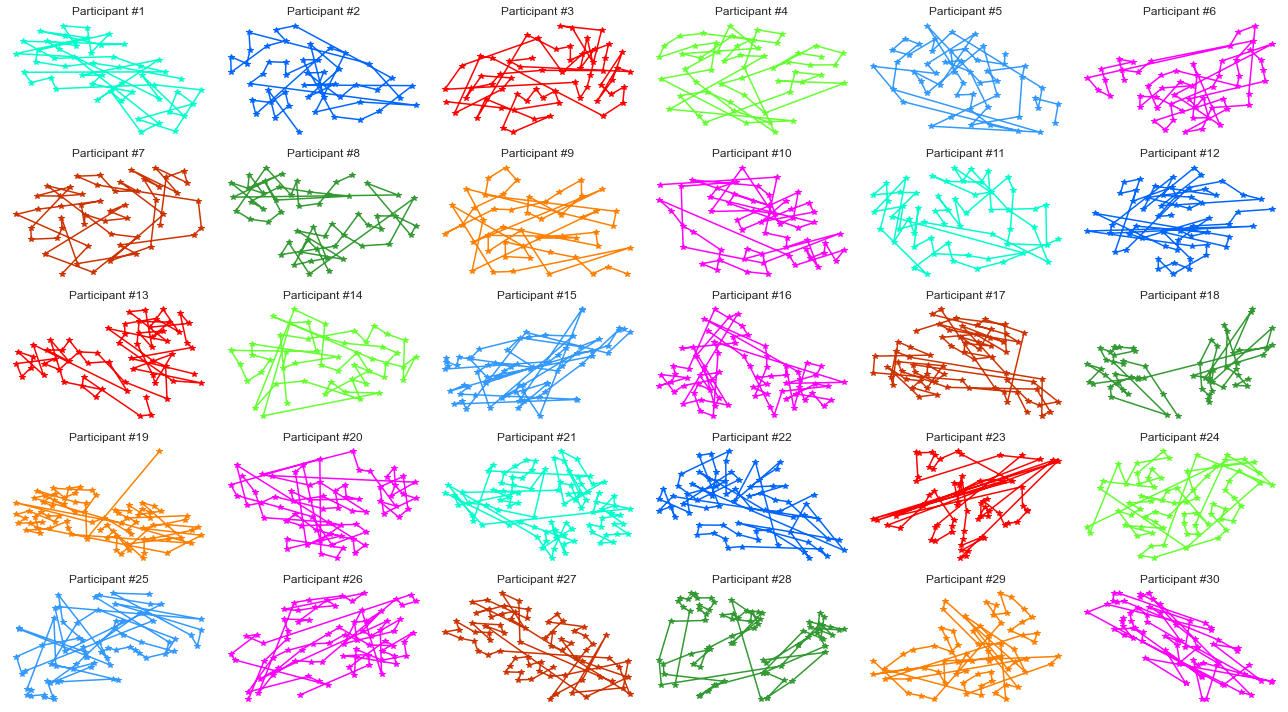

######################################################################
Participants unique WALKING pattern
######################################################################


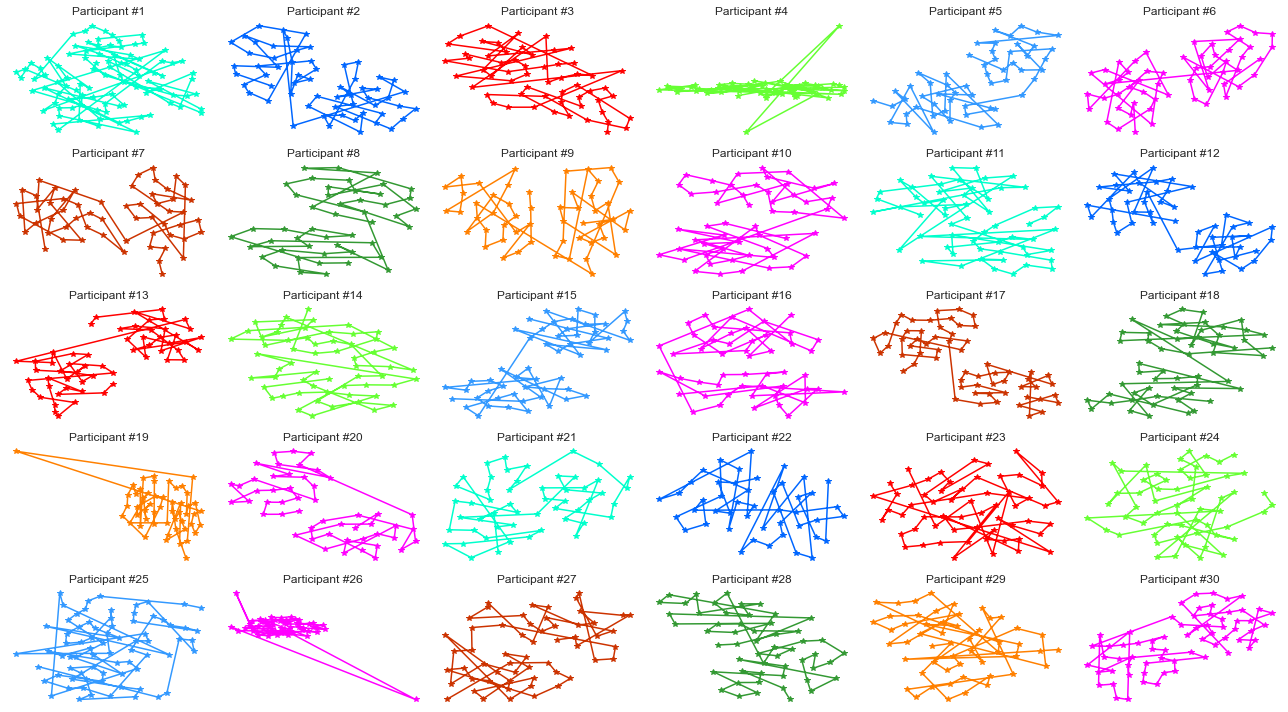

######################################################################
Participants unique WALKING_DOWNSTAIRS pattern
######################################################################


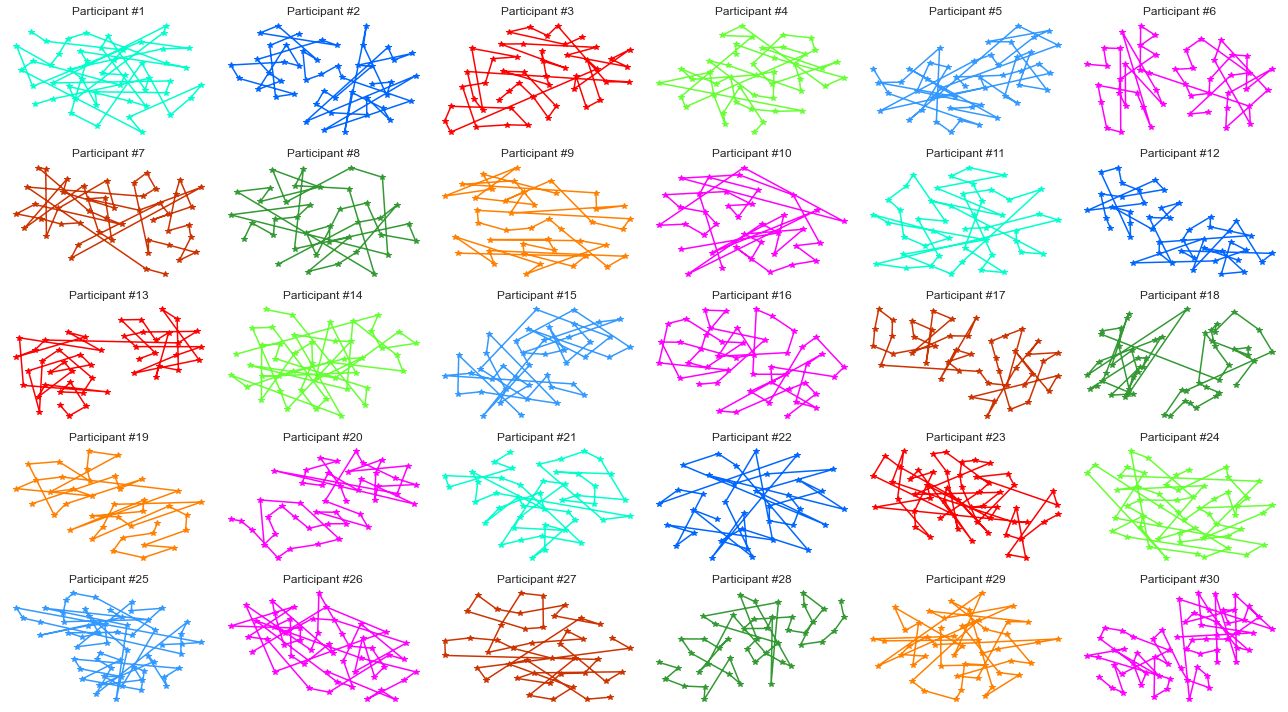

######################################################################
Participants unique WALKING_UPSTAIRS pattern
######################################################################


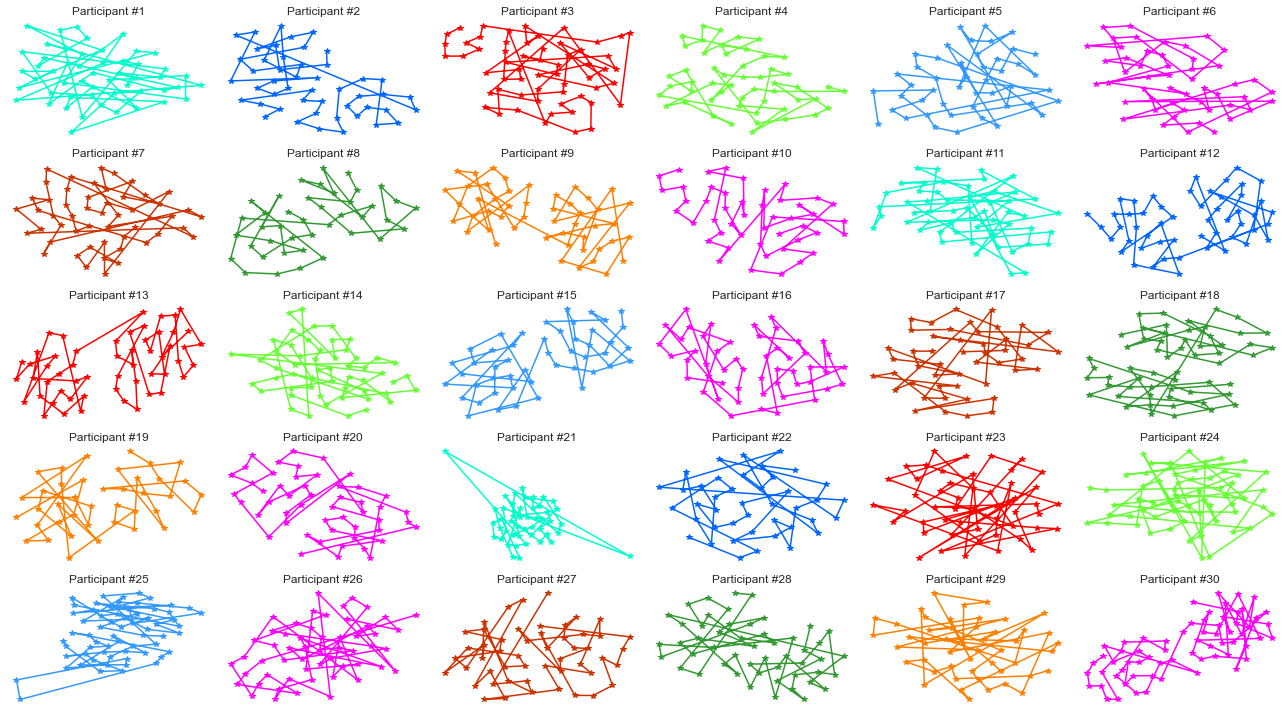

In [229]:
#fig, ax = plt.subplots(5,6, figsize=(18,10))
color_map=["#00ffcc","#0066ff","#ff0000","#66ff33","#3399ff","#ff00ff","#cc3300","#339933","#ff8000","#ff00ff","#00ffcc","#0066ff","#ff0000","#66ff33","#3399ff","#ff00ff","#cc3300","#339933","#ff8000","#ff00ff","#00ffcc","#0066ff","#ff0000","#66ff33","#3399ff","#ff00ff","#cc3300","#339933","#ff8000","#ff00ff"]
for i in range(len(label.unique())):
    
    fig, ax = plt.subplots(5,6, figsize=(18,10))
    
    print("#"*70)
    print('Participants unique {} pattern'.format(label.unique()[i]))
    print("#"*70)
    
    for sub in range(0,len(data_set['subject'].unique())):
        #Get all the walking related metrics (for Accelerometer and Gyroscope sensor attributes)
        person=data_set[(label==label.unique()[i]) & (data_set['subject']==(sub+1))].drop(['Activity','subject','Data'],axis=1)

        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(person)

        pca = PCA(0.9,random_state=1)
        pca_scaled_data = pca.fit_transform(scaled_data)

        tsne = TSNE(random_state=1)
        tsne_pca_scaled_data = tsne.fit_transform(pca_scaled_data)
        
               
        #Let's create the plot
        ax[sub//6][sub%6].plot(tsne_pca_scaled_data[:,0],tsne_pca_scaled_data[:,1],'*-',color=color_map[sub])
        ax[sub//6][sub%6].set_title('Participant #{}'.format(sub+1))
        ax[sub//6][sub%6].axis('off')
        
    plt.tight_layout()
    plt.show()

##### The patterns for certain participants across different flavor of activities seems to have a different pattern, like for example, in the above case, we could see "Participant 7" in "SITTING" , "Particpant 14 in STANDING" and so on. Infact we can see such patterns in various other participants as well as across other activities

In [230]:
DecisionTreeClassifier().__class__.__name__

'DecisionTreeClassifier'

Model  Train dataset score
0  DecisionTreeClassifier             0.819515
1  RandomForestClassifier             0.934580
2    KNeighborsClassifier             0.956913
3                     SVC             0.967351
4                     SVC             0.968443
5              GaussianNB             0.818059
6      LogisticRegression             0.966865

Model  Test dataset score
0  DecisionTreeClassifier            0.776214
1  RandomForestClassifier            0.892718
2    KNeighborsClassifier            0.912621
3                     SVC            0.934466
4                     SVC            0.929612
5              GaussianNB            0.814563
6      LogisticRegression            0.939320

<Figure size 720x576 with 0 Axes>

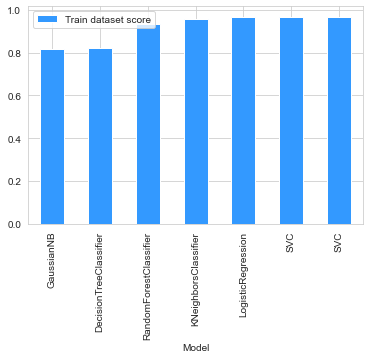

<Figure size 720x432 with 0 Axes>

In [240]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

data_set_train_c = pd.read_csv('./train.csv')
data_set_test_c = pd.read_csv('./test.csv')

data_set_classifier = pd.concat([data_set_train_c,data_set_test_c])

X = data_set_classifier.drop(['Activity'],axis=1)
Y = data_set_classifier['Activity']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA(0.95)
X_scaled_pca = pca.fit_transform(X_scaled)

encoder = LabelEncoder()
Y_train_encoded = encoder.fit_transform(Y_train)

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    GaussianNB(),
    LogisticRegression()
]

models = []
scores = []

for clf in classifiers:
    models.append(clf.__class__.__name__)
    scores.append(cross_val_score(clf,X_scaled_pca,Y_train_encoded,cv=5).mean())

plt.figure(figsize=(10,8))

Model_train_df = pd.DataFrame({'Model':models,'Train dataset score':scores})
display(Model_train_df)


models_test = []
scores_test = []

scaler = StandardScaler()
X_scaled_test = scaler.fit_transform(X_test)

pca = PCA(0.9)
X_scaled_pca_test = pca.fit_transform(X_scaled_test)

encoder = LabelEncoder()
Y_test_encoded = encoder.fit_transform(Y_test)

for clf in classifiers:
    models_test.append(clf.__class__.__name__)
    scores_test.append(cross_val_score(clf,X_scaled_pca_test,Y_test_encoded,cv=5).mean())

Model_test_df = pd.DataFrame({'Model':models_test,'Test dataset score':scores_test})
display(Model_test_df)

Model_train_df.sort_values(by='Train dataset score').plot(kind='bar',x='Model',y='Train dataset score',color='#3399ff')
#Model_train_df.plot(Model_train_df,'Model','Train dataset score')

fig = plt.figure(figsize=(10,6))


plt.show()

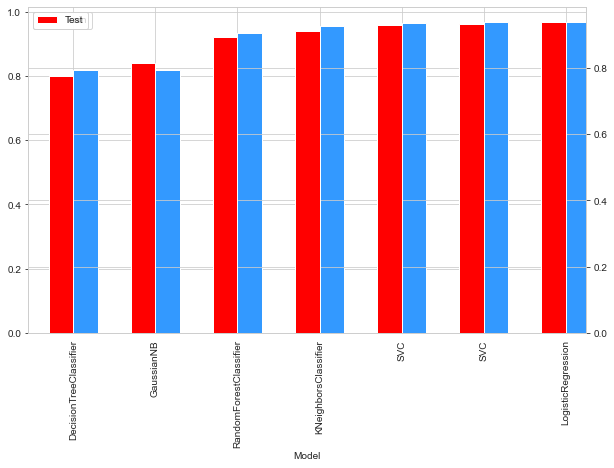

In [241]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)
ax2 = ax.twinx()
width=.3

Model_train_df.sort_values(by='Train dataset score').plot(kind='bar',x='Model',y='Train dataset score',color='#3399ff',ax=ax,position=0,width=width,label='Train')
Model_test_df.sort_values(by='Test dataset score').plot(kind='bar',x='Model',y='Test dataset score',color='#ff0000',ax=ax2,position=1,width=width,label='Test')

plt.show()

#### Model evaluation

LAYING  SITTING  STANDING  WALKING  WALKING DOWNSTAIRS  \
LAYING                 377        0         0        0                   0   
SITTING                  0      349        15        0                   0   
STANDING                 0       44       346        0                   0   
WALKING                  0        0         0      332                   1   
WALKING DOWNSTAIRS       0        0         0        1                 274   
WALKING UPSTAIRS         0        0         0        1                   1   

                    WALKING UPSTAIRS  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                            2  
WALKING DOWNSTAIRS                 3  
WALKING UPSTAIRS                 314

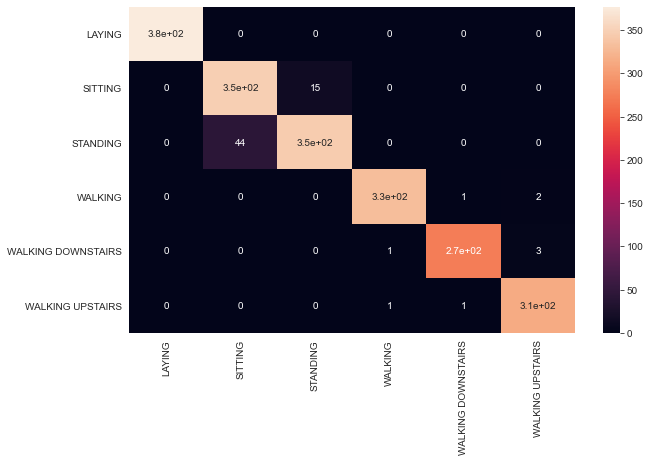

In [242]:
from sklearn.metrics import confusion_matrix

#Since SVC is one of the Top scorers w.r.t Accuracy, we would pick up SVC Kernel
data_set_train = pd.read_csv('./train.csv')
data_set_test = pd.read_csv('./test.csv')

data_set_classifier = pd.concat([data_set_train,data_set_test])

X = data_set_classifier.drop(['Activity'],axis=1)
Y = data_set_classifier['Activity']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)


pca = PCA(0.95)
X_scaled_pca = pca.fit_transform(X_scaled)
X_test_scaled_pca = pca.transform(X_scaled_test)

encoder = LabelEncoder()
Y_train_encoded = encoder.fit_transform(Y_train)
Y_test_encoded = encoder.transform(Y_test)

svc = SVC(kernel='linear')
svc_pred = svc.fit(X_scaled_pca,Y_train_encoded)

y_test_pred = svc.predict(X_test_scaled_pca)

matrix = confusion_matrix(Y_test_encoded,y_test_pred)
matrix_df = pd.DataFrame(matrix)
matrix_df.index=['LAYING', 'SITTING', 'STANDING', 'WALKING' ,'WALKING DOWNSTAIRS','WALKING UPSTAIRS']
matrix_df.columns=['LAYING', 'SITTING', 'STANDING', 'WALKING' ,'WALKING DOWNSTAIRS','WALKING UPSTAIRS']
display(matrix_df)

plt.figure(figsize=(10,6))
plt.xlabel=("Predicted score")
plt.ylabel=("True score")
sns.heatmap(matrix_df,annot=True)
plt.show()

#### As we can see that the number of predictions going for a toss is at the "SITTING" and "STANDING" activities as the clusters for these 2 activities seems to be similar w.r.t the sensor attributes/parameters.